# Dividir el dataset en conjunto de entrenamiento y de testing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/Users/nuelcodes/Data-Science-Python/datasets/ads/Advertising.csv")

In [9]:
a = np.random.randn(len(data))

In [21]:
a

array([ 0.36687233,  0.45808315, -1.45144984, -0.13613686, -1.48220124,
       -1.49833479, -0.68407735,  1.72243095,  0.33392265, -1.49026089,
       -0.81489182,  0.22001632,  1.44137897, -0.26370132,  0.63640279,
        0.03718162,  0.82458266,  0.40541446, -0.97434413,  1.66530442,
       -0.42014164, -0.02405733, -1.15049529, -0.3884896 ,  0.98458238,
        0.04893312, -0.29342351, -1.32515642, -0.01812654, -1.92209238,
        0.27182326, -0.06978159, -0.25954674,  1.28014444,  2.30917488,
        0.77426567,  0.00823344, -1.973878  ,  0.26329629,  1.20898566,
        0.8519872 ,  1.17781785, -1.22649426,  0.06207098, -1.10737754,
       -0.99449949, -0.28840083, -0.59665972,  0.53703308, -1.63746003,
        0.48752742,  1.05976577, -0.25074101, -1.28285412, -1.41640347,
       -0.53017583, -1.44879074,  1.68443752, -0.2298861 ,  0.48805636,
        1.52105777,  1.87285745, -1.03702954,  0.31575394,  1.07541203,
        1.07397124,  1.63334968, -0.53261089, -0.11557526,  1.18

(array([ 3.,  8., 27., 27., 51., 37., 29., 14.,  3.,  1.]),
 array([-2.80844234, -2.22763651, -1.64683069, -1.06602486, -0.48521904,
         0.09558679,  0.67639261,  1.25719844,  1.83800426,  2.41881008,
         2.99961591]),
 <a list of 10 Patch objects>)

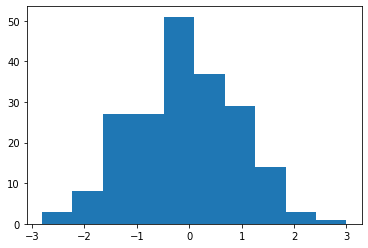

In [10]:
plt.hist(a)

In [12]:
check = (a < 0.8) # Condicion de que me quedare con el 80% de los elementos
training = data[check]
testing = data[~check]

In [13]:
len(training), len(testing)

(157, 43)

In [14]:
import statsmodels.formula.api as smf # smf = statsmodelformula
lm = smf.ols(formula="Sales~TV+Radio", data = training).fit()

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     597.0
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.84e-73
Time:                        06:04:30   Log-Likelihood:                -309.20
No. Observations:                 157   AIC:                             624.4
Df Residuals:                     154   BIC:                             633.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7244      0.354      7.693      0.000       2.025       3.424
TV             0.0457      0.002     28.064      0.000       0.042       0.049
Radio          0.1921      0.009     20.458      0.000       0.174       0.211
==============================================================================
Omnibus:                       51.363   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.414
Skew:                          -1.376   Prob(JB):                     5.84e-28
Kurtosis:                       6.406   Cond. No.                         438.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.7244 + 0.0457 * TV + 0.1921 * Radio

## Validación del modelo con el conjunto de testing

In [17]:
# Predecir los valores de ventas de los datos que no se han utilizado
sales_pred = lm.predict(testing)
sales_pred #Datos que no se habían  utilizado en el modelo

7      11.982065
12     10.553545
16     12.852459
19     14.046423
24      7.991560
33     18.703729
34      7.366832
39     20.384935
40     16.261782
41     17.228337
51      9.156553
57     12.636446
60      5.553514
61     22.867080
64     16.936094
65      7.663941
66      8.888761
69     21.063890
70     17.700536
76      4.288478
83     14.397189
91      4.319542
96     12.427039
97     15.207771
111    21.068650
115    12.878769
118    15.556132
132     8.332450
137    20.783276
141    18.375663
148    12.201226
152    16.229915
153    18.177851
159    12.277142
164    10.903848
166    10.764074
175    24.770806
176    19.876740
181    13.747099
183    24.126620
192     4.297925
196     7.970507
199    14.983231
dtype: float64

In [18]:
SSD = sum((testing["Sales"] - sales_pred)**2)
SSD

87.97004854281634

In [19]:
RSE = np.sqrt(SSD / (len(testing) - 2 - 1))
RSE

1.4829872600836491

In [20]:
sales_mean = np.mean(testing["Sales"])
error = RSE / sales_mean
error # porcentaje de error

0.10288553111261198